# Pre-machine learning

In [3]:
#%reset

Comenzamos con una serie pequeña de datos proporcionados por la maestra. Nuestro objetivo es que de un connjunto de datos obtengamos una linealización.

# Likelihood - Método metrópolis

Usando los mismos datos anteriores ahora intentaremos encontrar la recta más acercada con el método de metrópolis

En estadística, la función de verosimilitud (o, simplemente, verosimilitud) es una función de los parámetros de un modelo estadístico que permite realizar inferencias acerca de su valor a partir de un conjunto de observaciones.

En cierto sentido, la verosimilitud es una versión inversa de la probabilidad condicional. Conocido un parámetro B, la probabilidad condicional de A es P(A|B), pero si se conoce A, pueden realizarse inferencias sobre el valor de B gracias al teorema de Bayes, según el cual

$ {\displaystyle P(B\mid A)={\frac {P(A\mid B)\;P(B)}{P(A)}}.\!}$

La función de verosimilitud, $L( b |A)$, definida como

${\displaystyle L(b\mid A)=P(A\mid B=b),\!}$

 Pero cuando la noción de verosimilitud se extiende a variables aleatorias con una función de densidad f sobre, por ejemplo, el eje real, la probabilidad de un evento cualquiera es nula. Por ejemplo, supóngase el caso de tener una variable aleatoria real de distribución desconocida X de la que se extrae una muestra ${\displaystyle x_{1},...,x_{n}}$ de observaciones independientes. Supóngase también que se dispone de una familia parametrizada de funciones de densidad ${\displaystyle f_{\theta }(x)}$ (es decir, que existe una función de densidad ${\displaystyle f_{\theta }(x)}$ para cada valor del parámetro$ {\displaystyle \theta (x)}$.

En este caso, ${\displaystyle \theta (x)}$ juega el papel de parámetro desconocido y es razonable definir la función de verosimilitud ${\displaystyle L(\theta )}$ de la siguiente manera:

${\displaystyle L(\theta )=L(\theta \mid x_{1},...,x_{n})=\prod _{i}f_{\theta }(x_{i}).}{\displaystyle L(\theta )=L(\theta \mid x_{1},...,x_{n})=\prod _{i}f_{\theta }(x_{i}).}$

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#datos proporcionados por la maestra, son 3 columnas, x, y, error de y
#La columna "error de y" nos servirá para la distribución chi^2

data = np.load('fit_exercise.npy') 
#data

In [14]:
x = data[0,:]      #primer renglón
#print(x)
y = data[1,:]      #segundo renglón
y_err = data[2,:]  #tercer renglón
n = len(x)         #Tamaño de  nuestros vectores

In [15]:
""""Primero vamos a definir una función de una recta.
Nuestro propósito principal es encontrar los coeficientes m y b correctos tales que se ajustan a la solución obtenida en el
ejercicio pasado.
Vamos a conocer todos los m y b posibles que se acerquen a la solución ideal."""

n_pasos = 1000               #número de iteraciones que vamos a realizar nuestro experimento, mientras más grande más probable es que encontremos los m y b correctos
m = np.zeros(n_pasos)        #Aquí vamosa guardar todos los m que encontremos se acercan a la recta ideal
b = np.zeros(n_pasos)        #Aquí vamosa guardar todos los b que encontremos que se acercan a la recta ideal

m[0] = 1      #aquí YO fijo ARBITRARIAMENTE que este valor de 'm' puede ser el correcto, aquí comienza a contar mi programa.
b[0] = 1      #aquí YO fijo ARBITRARIAMENTE que este valor de 'b' puede ser el correcto, aquí comienza a contar mi programa.

#es preferible no comenzar en cero, para poder visualizar nuestros datos.

# Algoritmo de metrópolis

In [33]:
#definimos la función con la que aproximaremos nuestro likelihood, en este caso es una func. lineal
def f(x,pendiente,cte):
    f = pendiente*x + cte
    return f

#definimos una función para el likelihood
def Likelihood(m,b,y,x,error_y):
    #y es los valores reales que tiene nuestra distribución en el i-ésimo evento
    #f es la función de distribución a la que deseamos acercarnos
    L=1
    for i in range(len(y)):
        L = L*((y[i] - f(x[i],m,b)))/error_y[i]
    return L


iteramos: 4


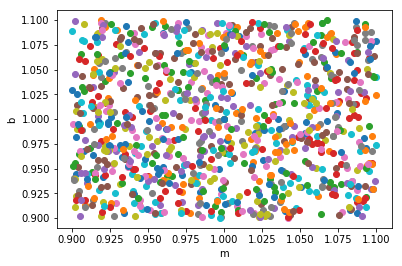

In [35]:
"""Aquí vamos a comenzar a hacer iteraciones de los valores de m y de b para encontrar el que se acerque más a la línea ideal.
Para esto comenzaremos en los 'm' y 'b' que fijamos anteriormente y le añadiremos un valor ALEATORIO hacia el cual
se pueda mover de manera que se acerque a la solución más acertada"""

delta = 0.2
L_v = 1
m_v = 1
b_v = 1
counting = 0
for i in range(1,n_pasos):
    m_rnd = (np.random.rand(1) -0.5)*delta  #m aleatorios
    b_rnd = (np.random.rand(1) - 0.5)*delta #b aleatorios
    #el 0.5 es para que también nos den número negativos
    
    m_n = m_v + m_rnd  #aquí guardamos moentáneamente 'm'
    b_n = b_v + b_rnd #aquí guardamos moentáneamente 'b'
    
    L_n = Likelihood(m_n,b_n,x,y,y_err)
    #print(L_n)
    
    if L_n > L_v: #comparamos si el likelihood nuevo es mayor al viejo
        
        """Reescribimos los valores de nuestras constantes"""
        
        L_v = np.copy(L_n)
        m_n = np.copy(m_v)
        b_n = np.copy(b_v)
        
        counting = counting+1
        
    plt.plot(m_n,b_n,'o')
    plt.xlabel('m')
    plt.ylabel('b')
        
print('número de iteraciones:',counting)    
#m
#print(L_n)
#b